<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyKOLK</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Solution</b> pockets</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyKOLK.png"></td>
</tr>
</table>

----
# `pyKOLK`

pyKOLK, a program package prediction the shape of solution pockets in caves from pre-defined climate conditions.

In [1]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
import sys
import libKOLK

----
# Solution pocket -flow model-
In this notebook, we create all function to model the shape of a solution pocket, driven by pre-defined climate variables.

## Grid
We define as horizontal and vertical coordinate $x_i$ and $y_i$ [m].

----
## Example 2: CO$_2$ difference

1 500.0 50
2 1000.0 50
3 1500.0 50
4 2000.0 50
5 2500.0 50
6 3000.0 50
7 3500.0 50
8 4000.0 50
9 4500.0 50
10 5000.0 50


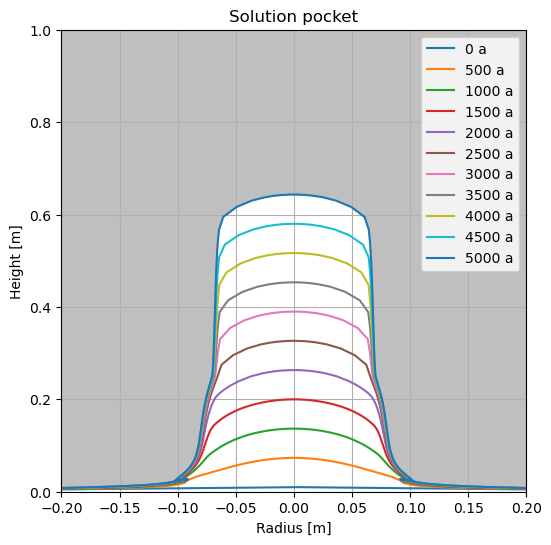

In [2]:
#=======================================================
#=== geometry ==========================================
#=======================================================
sidex,nx      = 0.40,801           # length in x-direction [m], nx
init_height   = 0.01               # initial cone height [m]
#=======================================================
#=== define time series ================================
#=======================================================
timemin   = 0.      # start time [a]
timemax   = 5000    # end time [a]
timestep  = 1/12    # [a]
timewrite = 500
#=======================================================
#=== climate ===========================================
#=======================================================
tempSoilmin,tempSoilmax =  8.,   8.      # soil temperature [C]
pco2Soilmin,pco2Soilmax =  400., 400.  # soil CO2 pressure [ppm]
pco2atm  =  400.                   # atm CO2 pressure [ppm]
tempCavemin,tempCavemax = 8.,8.                # cave temperature [C]
pco2Cavemin,pco2Cavemax = 1000.,1000.# cave CO2 pressure [ppm]
dropCavemin,dropCavemax =  10.,   10.    # time between two drops [s]

x,y,dx,shape = libKOLK.createGrid(sidex,nx,init_height,plot=False)
time = libKOLK.createTime(timemin,timemax,timestep)
tempSoil,tempCave,pco2Soil,pco2Cave,dropCave = libKOLK.createClimate(time,timemin,timemax,tempSoilmin,tempSoilmax,pco2Soilmin,pco2Soilmax,
                                                       tempCavemin,tempCavemax,pco2Cavemin,pco2Cavemax,dropCavemin,dropCavemax,plot=False)

shape,iSave,CEQcave = libKOLK.createKolk_flow(x,y,dx,shape,time,timestep,timewrite,tempSoil,pco2Soil,tempCave,pco2Cave,dropCave)
libKOLK.plotKolk(shape,sidex,iSave,timewrite)

----